## Visualising the tips dataset

While `pandas` functions were used above to look at a summary statistics of the dataset using statistics, the `seaborn` package will now be used to create some visualisations of the dataset that can be used to verify these summary statistics. `pandas` does have some basic plotting functionality built in from the `matplotlib` package. `seaborn` is built on top of`matplotlib` and closely integrated with `pandas` data structures.
 
Plots can highlight any obvious relationships between the different variables in the dataset. They can also be used to identify any groups of observations that are clearly separate to other groups of observations. There are many different ways to visualise this dataset using the seaborn library and no universal best way. I will look through the examples and documentation on <https://seaborn.pydata.org> and see which ones are most suitable for the tips dataset and learn more about the seaborn plotting functions.

Most of the plots that follow in the notebook are based on the official [seaborn tutorial](https://seaborn.pydata.org/tutorial.html) and adapted for this project.
***
 
[Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html#visualizing-statistical-relationships)
>Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.



Seaborn's `relplot()` is a (figure-level) function for visualizing statistical relationships using scatter plots or line plots. These are fairly simple 2 dimensional plots of the data but further dimensions can be added where the hue(colour), size, and style semantics of the points can take on meaning representing further variables in the same plot.

Showing several semantic variables at the same time on a single plot may not always be suitable, instead multiple plots may be more appropriate for showing the relationship between multiple variables. Instead of using additional variables as semantics they could be used to facet the plots. This is where you make multiple axes and plot subsets of the data on each one. (`FacetGrid`).

The [Figure-level and axes-level functions](https://seaborn.pydata.org/introduction.html#figure-level-and-axes-level-functions) section of the seaborn introductory guide discusses the differences between seaborn plotting functions. 

>“figure-level” functions are optimized for exploratory analysis because they set up the matplotlib figure containing the plot(s) and make it easy to spread out the visualization across multiple axes using seaborn `FacetGrid` to place the legend outside the axes. 

Scatter and line plots are used to visualise relationships between numerical variables. 
The scatter plot shows the joint distribution of two variables where each point represents an observation in the dataset and can be used to spot relationships. Line plots are generally used to show changes in a variable as a function of time. However this is not applicable for the tips dataset which doesn't have a real time variable. The `time` variable is just a binary categorical variables that represents lunch or dinner. 



 
 
The `pairplot` function in seaborn show scatter plots of the variables against each other. A kernel density function or histogram is displayed down the diagonal. 

The `catplot()` can show different representations of the relationship between one numeric variable and one (or more) categorical variables by specifying the `kind` of plot to use. 
- `kind="swarm"` creates a scatter plot where the positions of the points along the categorical axis are adjusted to avoid overlapping points while 
    `sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=tips)`

- `kind = "violin"` creates a kernel density estimation to represent the underlying distribution that the points are sampled from.
`sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips)`

- `kind ="bar"` to show only the mean value and its confidence interval within each nested category

`sns.catplot(x="day", y="total_bill", hue="smoker",kind="bar", data=tips)`


[Specialised categorical plots](https://seaborn.pydata.org/introduction.html#specialized-categorical-plots)

### Figure level and Axes level function
The [Figure-level and axes-level functions](https://seaborn.pydata.org/introduction.html#figure-level-and-axes-level-functions) section of the seaborn introductory guide discusses the differences between seaborn plotting functions. 

“figure-level” functions are optimized for exploratory analysis because they set up the matplotlib figure containing the plot(s) and make it easy to spread out the visualization across multiple axes using seaborn `FacetGrid` to place the legend outside the axes. 

>Each different figure-level plot kind combines a particular “axes-level” function with the FacetGrid object. For example, the scatter plots are drawn using the scatterplot() function, and the bar plots are drawn using the barplot() function. These functions are called “axes-level” because they draw onto a single matplotlib axes and don’t otherwise affect the rest of the figure.

Figure-level function must control the figure it lives in, while axes-level functions can be combined into a more complex matplotlib figure with other axes that may or may not have seaborn plots on them.
"Axes-level" plot functions take an `ax=` parameter while a "figure-level" function does not. A figure-level functions returns the `FacetGrid` while axes-level functions return the `matplotlib` axes.



### moving some plots from the main file for now

#### Violin plot
A violin plot combines a boxplot with the kernel density estimate to providing a richer description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. This gets a bit complex though.
You can split the violins when the hue paramter has only two levels to save space.
You can also show each individual observation instead of the summary boxplot values inside the violins using `inner="stick"`.
It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

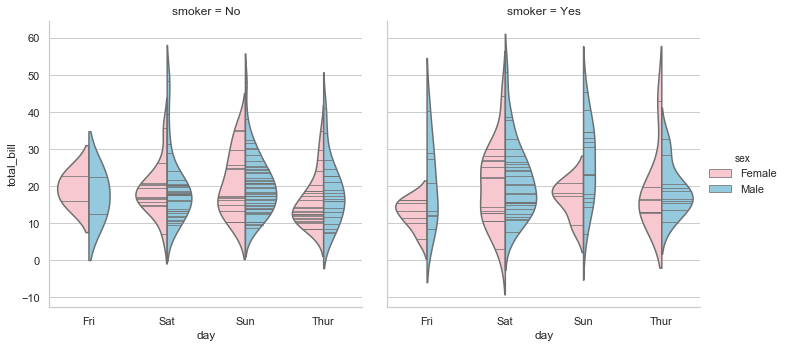

In [70]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=df, col="smoker", inner="stick",palette=["pink","skyblue"])

Combining swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

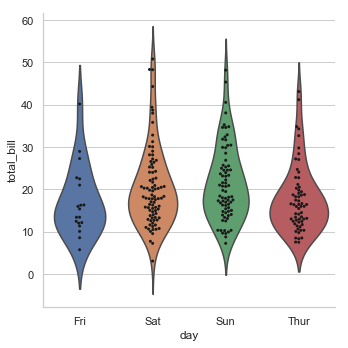

In [71]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=df)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=df, ax=g.ax);

### [Distribution of observations within categories](https://seaborn.pydata.org/tutorial/categorical.html#distributions-of-observations-within-categories)

For larger datasets there are several plots that are suitable for illustrating the distribution of values within categories and allowing comparisons across the category levels.

The boxplot shows the three quartile values of the distribution along with extreme values. It's **whiskers** extend to points that lie within 1.5 IQRs of the lower and upper quartile.  The observations that fall outside this range are displayed independently. Each value in a boxplot corresponds to an actual observation in the data.

For larger datasets there is the `boxenplot` which is similar to the box plot. 

A `violinplot()` combines a boxplot with the kernel density estimation procedure to show the distribution of values. 
The boxplot's quartile and whisker values are shown inside the violin. 

It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

#### Boxplots - distribution of observations within categories

A [box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot) (or box-and-whisker plot) 
>shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

A box plot can be drawn for a single quantitative variable on it's own or grouped by a categorical variable or with nested groupings for two categorical variables. the order of the box can be controlled by passign an explicit order.
Here I will draw several box plots for the tips dataset.
As there are some outliers in tip size, the values are squashed into a smaller box to fit the outliers. 

### Plotting Categorical data
[plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html#plotting-with-categorical-data)
>In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

Seaborn has several ways for visualising relationships where some variables are categorical such as in the tips dataset where there are several categorical variables such  as sex, smoker, day and time.

There are some axes-level functions for plotting categorical data in different ways and also a figure-level interface  `catplot()` which can be used with these functions.

There are also some categorical estimate plots:

`pointplot()` (with kind="point"), `barplot()` (with kind="bar"), `countplot()` (with kind="count")

These variations use different levels of granularity to represent the data.

The `catplot` function is the figure-level interface of each of these functions mentioned here and it defaults to a scatterplot but it can be changed by setting the `kind` argument to `strip` for a `stripplot`, `swarm` for a `swarmplot`. Categorical distributions can be plotted using `catplot` by setting `kind` equal to `box` for a `boxplot`, `violin` for a  `violinplot()` and `boxen` for a `boxenplot()`.


### Categorical scatter plots of the Tips dataset

The`catplot`represents data using a scatterplot as default (a stripplot is the kind) but as many points belonging to a category would overlap it uses some random jitter to adjust the points which can be turned off by setting `jitter = False`.
Alternatively the points can be adjusted along the categorical axis in a `swarmplot` to prevent them from overlapping and this better represents the distribution of observations (for relatively small datasets). 

A hue sematic can be used to add another dimension to a categorical plot.

You can control the order of the levels of the categorical variables along the axis (usually the horizontal axis but it can be changed to the vertical axis for longer names or many categories) by specifying the `order` to the plot.  If the variable is a pandas `categorical` datatype then the order can be set there. Seaborn tries to infer the data from the order. For numerical looking variables it will order them by levels although still treated as categorical data.

